In [81]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import random # type: ignore
from pprint import pprint # type: ignore
import plotly.express as px # type: ignore
from tabulate import tabulate # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

### Descriptive analysis

In [82]:
path = "https://raw.githubusercontent.com/depa-tto/Machine-Learning-Module/main/mashroom_dataset.csv"

df = pd.read_csv(path, sep = ';')

df = df.rename(columns={"class": "label"})
temp_cols = df.columns.tolist()
new_cols = temp_cols[1:] + temp_cols[0:1]
df = df[new_cols]

df.head()

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e          NaN          w        16.95       17.09  ...   
1               e          NaN          w        17.99       18.19  ...   
2               e          NaN          w        17.80       17.74  ...   
3               e          NaN          w        15.77       15.98  ...   
4               e          NaN          w        16.53       17.20  ...   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season label  
0               NaN       d      w     p  
1               NaN       d      u     p  
2               NaN       d      w     p  
3               NaN       d      w     p  
4               NaN       d      w     p  

[5 rows x 21 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [84]:
na_counts = df.isnull().sum()

table = [[col, na_counts[col]] for col in na_counts.index]
col_names = ["Features", "NA"]

print(tabulate(table, headers=col_names))

Features                 NA
--------------------  -----
cap-diameter              0
cap-shape                 0
cap-surface           14120
cap-color                 0
does-bruise-or-bleed      0
gill-attachment        9884
gill-spacing          25063
gill-color                0
stem-height               0
stem-width                0
stem-root             51538
stem-surface          38124
stem-color                0
veil-type             57892
veil-color            53656
has-ring                  0
ring-type              2471
spore-print-color     54715
habitat                   0
season                    0
label                     0


In [85]:
df = df.drop(['gill-spacing','stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis = 1)

In [86]:
df['cap-shape'] = df['cap-shape'].map({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 's':'sunken', 'p':'spherical', 'o':'others'})
df['cap-surface'] = df['cap-surface'].map({'i':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth', 'h':'shiny', 'l':'leathery', 'k':'silky', 't':'sticky', 'w':'wrinkled', 'e':'fleshy', 'd': 'dry'})
df['cap-color'] = df['cap-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black'})
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].map({'t':'bruises-bleedin', 'f':'not-bruises-bleedin'})
df['gill-attachment'] = df['gill-attachment'].map({'a':'bell', 'x':'conical', 'd':'convex', 'e':'flat', 's':'sunken', 'p':'spherical', 'f':'none', '?':'none'})
df['gill-color'] = df['gill-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df['stem-color'] = df['stem-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df['has-ring'] = df['has-ring'].map({'t':'ring', 'f':'none'})
df['ring-type'] = df['ring-type'].map({'c':'cobwebby', 'e':'evanescent', 'r':'flaring', 'g':'grooved', 'l':'large', 'p':'pendant', 's':'sheathing', 'z':'zone', 'y':'scaly', 'm':'movable', 'f':'none', '?':'none'})
df['habitat'] = df['habitat'].map({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'h':'heaths', 'u':'urban', 'w':'waste', 'd':'woods'})
df['season'] = df['season'].map({'s':'spring', 'u':'summer', 'a':'autumn', 'w':'winter'})



In [87]:
df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
label                       0
dtype: int64

In [88]:
df = df.dropna(how = 'any')

In [89]:
df.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
label                   0
dtype: int64

In [90]:
len(df)

37065

In [91]:
dis = px.pie(df, names='label', color='label', color_discrete_sequence=['#008066','#B2D966'], title='Data Distribution')

dis.update_traces(textfont_size=18)  
dis.update_layout(width=700, height=500, plot_bgcolor='white', paper_bgcolor='white',
                  legend=dict(x=0.8, y=1, traceorder='normal', orientation='v', title_font=dict(size=16), font=dict(size=16)))

dis.show()

In [92]:
class_counts = df['label'].value_counts()

print(class_counts)

label
p    20121
e    16944
Name: count, dtype: int64


In [93]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          37065 non-null  float64
 1   cap-shape             37065 non-null  object 
 2   cap-surface           37065 non-null  object 
 3   cap-color             37065 non-null  object 
 4   does-bruise-or-bleed  37065 non-null  object 
 5   gill-attachment       37065 non-null  object 
 6   gill-color            37065 non-null  object 
 7   stem-height           37065 non-null  float64
 8   stem-width            37065 non-null  float64
 9   stem-color            37065 non-null  object 
 10  has-ring              37065 non-null  object 
 11  ring-type             37065 non-null  object 
 12  habitat               37065 non-null  object 
 13  season                37065 non-null  object 
 14  label                 37065 non-null  object 
dtypes: float64(3), object(12

In [94]:
for column in df.select_dtypes(include=np.number).columns:
    
    fig = px.box(data_frame=df, x='label', color='label', y=column, color_discrete_sequence=['#B2D966', '#008066'], orientation='v')
    fig.update_layout(
        width=600,   
        height=400,  
        plot_bgcolor='white', 
        paper_bgcolor='white',
        title=f'Box plot of {column}', 
        xaxis_title='Label',
        yaxis_title=column,
        showlegend=False
    )
    fig.show()

In [95]:
cormat = df.select_dtypes(include=np.number).corr()
round(cormat,2)

cap-diameter  stem-height  stem-width
cap-diameter          1.00         0.41        0.69
stem-height           0.41         1.00        0.51
stem-width            0.69         0.51        1.00

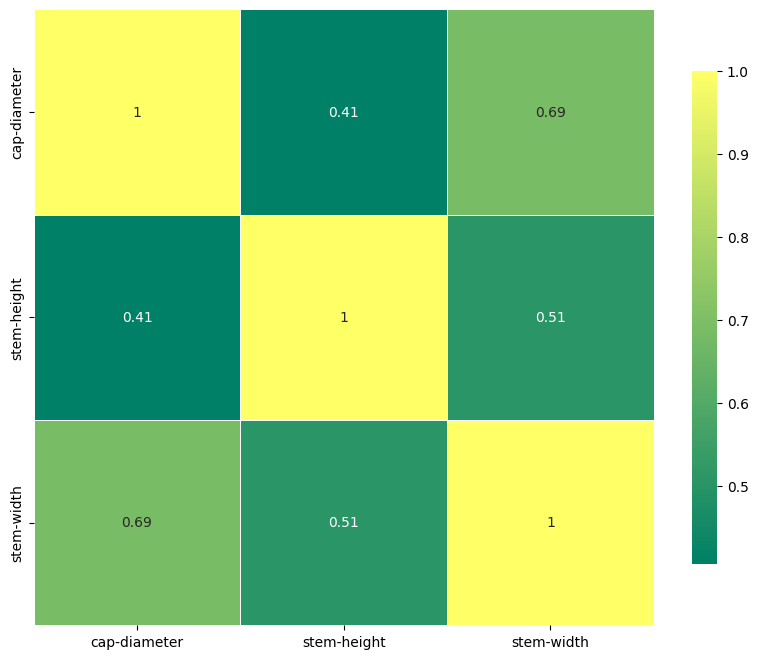

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(cormat, annot=True, cmap='summer', cbar_kws={'shrink': .8}, linewidths=0.5)
plt.show()

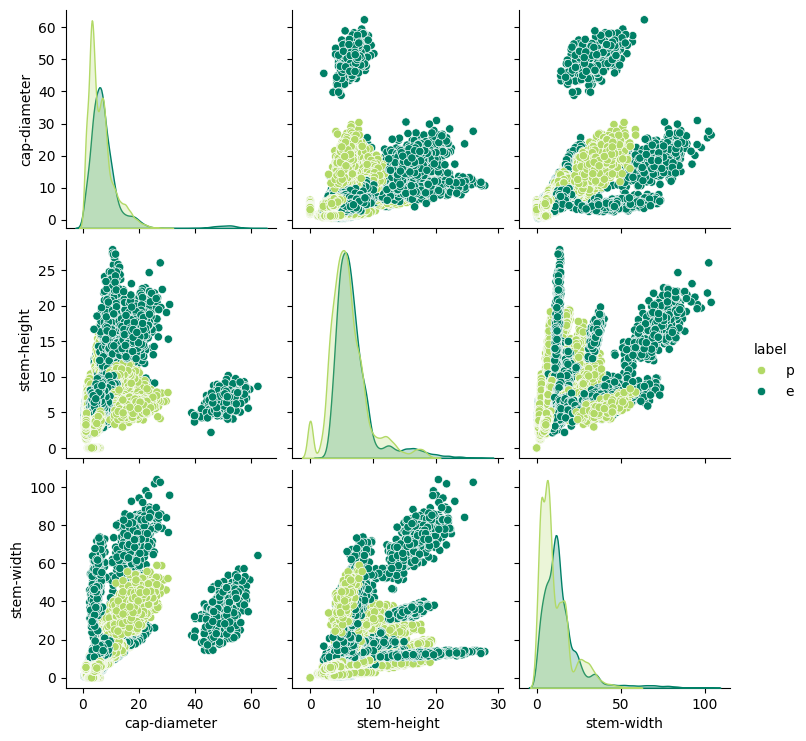

In [97]:
sns.pairplot(data=df, hue = 'label', palette=['#B2D966', '#008066'])

In [98]:
target_column = 'label' 

for column in df.drop(columns=[target_column]).select_dtypes(exclude=[np.number]).columns:

    crosstab = pd.crosstab(df[column], df[target_column]).reset_index() 

    crosstab['total'] = crosstab['e'] + crosstab['p'] 
    crosstab = crosstab.sort_values(by='total', ascending=False)

    crosstab_melted = crosstab.melt(id_vars=[column], value_vars=['e', 'p'], 
                                    var_name=target_column, value_name='Count')
    fig = px.bar(crosstab_melted, 
                 x=column, 
                 y='Count', 
                 color=target_column,
                 labels={column: column, 'Count': 'Count', target_column: 'Type'},
                 title=f'Frequencies of Edible and Poisonous mushroom for {column}',
                 color_discrete_map={'e': '#008066', 'p': '#B2D966'})

    fig.update_layout(
        width=550,
        height=450,
        plot_bgcolor='white',
        paper_bgcolor='white',
        barmode='stack',  
        xaxis_title=column,
        yaxis_title='Count',
        legend=dict(
            x=0.9,  
            y=0.9,     
            title='Type',
            traceorder='normal',
            orientation='v'
        )
    )

    fig.update_xaxes(categoryorder='total descending')

    fig.show()


In [99]:
df['cap-diameter'] = round(df['cap-diameter'], 3)
df['stem-width'] = round(df['stem-width'], 3)
df['stem-height'] = round(df['stem-height'], 3)

In [100]:
df['cap-diameter'] = pd.to_numeric(df['cap-diameter'], errors='coerce')
df['stem-width'] = pd.to_numeric(df['stem-width'], errors='coerce')
df['stem-height'] = pd.to_numeric(df['stem-height'], errors='coerce')


In [101]:
print(df.dtypes)

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
label                    object
dtype: object


### Train and test split

In [102]:
def split_train_test(df, test_size):

    """
    Splits the given dataset into training and testing subsets.
    
    Parameters:
    - df: the input dataset to be split.
    - test_size: specifies the size of the test set. Can be either:
        - An integer: number of rows for the test set.
        - A float: proportion of the total number of rows to be used as the test set.
    
    Returns:
    - A tuple (train_df, test_df) where:
        - train_df: dataset containing the training data.
        - test_df: dataset containing the test data.
    """
    
    if isinstance(test_size, float): # if the test size is a number or if is a proportion(float)
        test_size = round(test_size * len(df)) # we have to compute the number of rows this proportion represents

    indices = df.index.tolist() # list of row indices from the dataset
    test_indices = random.sample(population = indices, k = test_size) # we want to pick at random a certain number of these indices from this list

    test_df = df.loc[test_indices] # we create the test daframe by just indexing the rows with test indices
    train_df = df.drop(test_indices) # and the training set in created by dropping rows with the test indices
    
    return train_df, test_df

In [103]:
random.seed(0)
train_df, test_df = split_train_test(df, test_size = 0.20)

In [104]:
data = train_df.values # we transfrom from a pandas df to a numpy 2d array to make everything faster

In [105]:
len(data)

29652

In [106]:
len(test_df)

7413

### Type of feature

In [107]:
for column in df.columns:
    print(column, '-', len(df[column].unique()))

cap-diameter - 2533
cap-shape - 7
cap-surface - 11
cap-color - 12
does-bruise-or-bleed - 2
gill-attachment - 7
gill-color - 12
stem-height - 1926
stem-width - 4529
stem-color - 12
has-ring - 2
ring-type - 7
habitat - 7
season - 4
label - 2


In [108]:
def categorize_features(df):

    """
    Categorizes the features in the dataset into either 'categorical' or 'continuous'.
    
    Parameters:
    - df: The input dataset containing the features to be classified 
    
    Returns:
    - A list `feature_types` where each element corresponds to the type of a feature in the dataset.
    """
    
    feature_types = [] # we initialize an empty list to store the type of each feature
    n_unique_values_treshold = 15 # threshold for the number of unique values to determine if a feature is categorical
    
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique() # we get the unique values in the feature column
            example_value = unique_values[0] # we initially pick the first value from the unique values as a sample

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [109]:
FEATURE_TYPES = categorize_features(df)

In [110]:
FEATURE_TYPES

['continuous',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'continuous',
 'continuous',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'categorical']

### Is a node pure ?

In [111]:
def evaluate_purity(data):   

    """
    Evaluates whether the data is pure, meaning all examples in the data belong to the same class.
    
    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    
    Returns:
    - A boolean value:
      - True: if all the examples in the data belong to the same class (i.e., the data is pure).
      - False: if the examples belong to different classes (i.e., the data is impure).
    """

    label_column = data[:, -1]
    unique_classes = np.unique(label_column) # how many distinct classes are in this array ? we use the numpy function 'unique'

    if len(unique_classes) == 1: 
        return True # if there's only one unique class, the data is pure
    else:
        return False

In [112]:
label_column = data[:, -1]
unique_classes = np.unique(label_column) 

unique_classes

array(['e', 'p'], dtype=object)

In [113]:
evaluate_purity(data) 

False

In [114]:
evaluate_purity(train_df[train_df.label == 'e'].values) 

True

In [115]:
evaluate_purity(train_df[train_df['cap-diameter'] > 18].values)

False

### Classification

In [116]:
def determine_majority_class(data):

    """
    Determines the majority class in the given data, so in this case we want to classify if a data is poisoned or not
    
    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    
    Returns:
    - classification: the class that occurs most frequently in the label column.
    """
    
    label_column = data[:, -1]

    # we are going to find the unique classes and their respective counts in the label column
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True) 

    # we need to know the index of the largest value of the 'counts_unique_classes' array to see which is the class that appears most often
    # so we want to identify the index of the class with the highest count (most frequent class)
    index = counts_unique_classes.argmax() 
    classification = unique_classes[index]
    
    return classification

In [117]:
label_column = data[:, -1]
unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

In [118]:
unique_classes, counts_unique_classes # in this case we can see that the p class is the one that appears most

(array(['e', 'p'], dtype=object), array([13546, 16106], dtype=int64))

In [119]:
index = counts_unique_classes.argmax() 
classification = unique_classes[index]

In [120]:
index

1

In [121]:
classification # so p is the label that appears most often, and it is indexed 1, so it is in position 1 in the 'counts_unique_classes' array

'p'

In [122]:
determine_majority_class(train_df[train_df['cap-diameter'] < 10].values) # so considering 'cap-diameter' lower than 10 the p category is the one that appear most 

'p'

### Potential split

In [123]:
def find_possible_splits(data): # data which is a 2d numpy array

    """
    Identifies all possible splits for each feature in the dataset.

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.

    Returns:
    - potential_splits: a dictionary where the keys are column indices (features), and the values are arrays of possible split points.
    """
    
    potential_splits = {} # dictionary, that has as keys the indeces of the columns and as values the list that contains all the potential splits
    _, n_columns = data.shape # tuple that return the number of rows and the number of columns that we have in the dataframe, we only take the number of columns
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index] # values from the current feature column
        unique_values = np.unique(values) # all unique values in this column
        
        potential_splits[column_index] = unique_values # for every columns we are going to create an entry in our potential split dictionary, so we are going to append our potential split
    
    return potential_splits

In [124]:
data.shape

(29652, 15)

In [125]:
find_possible_splits(data) # the keys are the indecis of the columns and the values are the rows that contain numbers for the potential split, that are the unique values for every columns

{0: array([0.54, 0.56, 0.57, ..., 58.89, 59.46, 62.34], dtype=object),
 1: array(['bell', 'conical', 'convex', 'flat', 'others', 'spherical',
        'sunken'], dtype=object),
 2: array(['dry', 'fibrous', 'fleshy', 'grooves', 'leathery', 'scaly',
        'shiny', 'silky', 'smooth', 'sticky', 'wrinkled'], dtype=object),
 3: array(['black', 'blue', 'brown', 'buff', 'gray', 'green', 'orange',
        'pink', 'purple', 'red', 'white', 'yellow'], dtype=object),
 4: array(['bruises-bleedin', 'not-bruises-bleedin'], dtype=object),
 5: array(['bell', 'conical', 'convex', 'flat', 'none', 'spherical', 'sunken'],
       dtype=object),
 6: array(['black', 'brown', 'buff', 'gray', 'green', 'none', 'orange',
        'pink', 'purple', 'red', 'white', 'yellow'], dtype=object),
 7: array([0.0, 1.2, 1.21, ..., 27.16, 27.23, 27.85], dtype=object),
 8: array([0.0, 0.74, 0.77, ..., 95.68, 102.48, 103.91], dtype=object),
 9: array(['black', 'blue', 'brown', 'gray', 'green', 'none', 'orange',
        'pink',

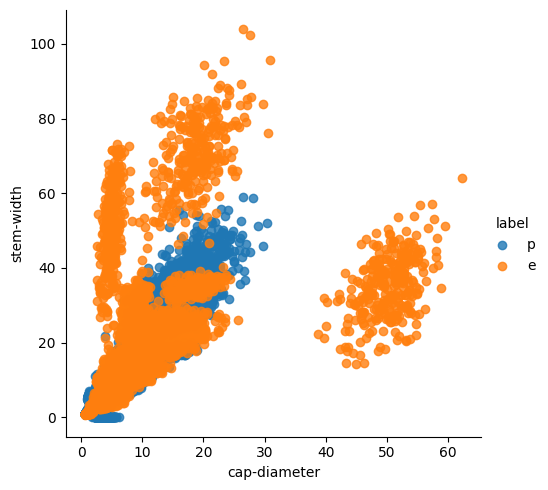

In [126]:
potential_split = find_possible_splits(data)

sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-width', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

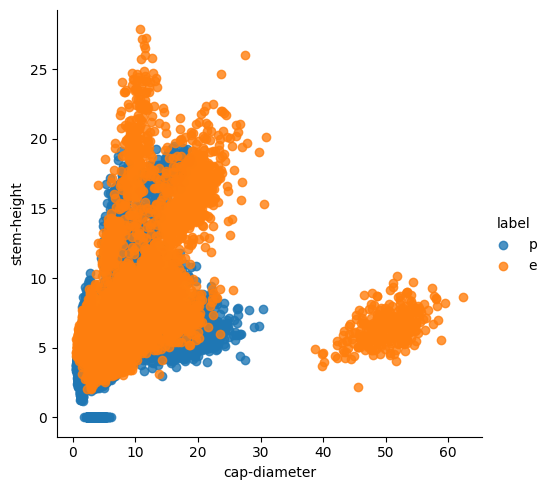

In [127]:
sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-height', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

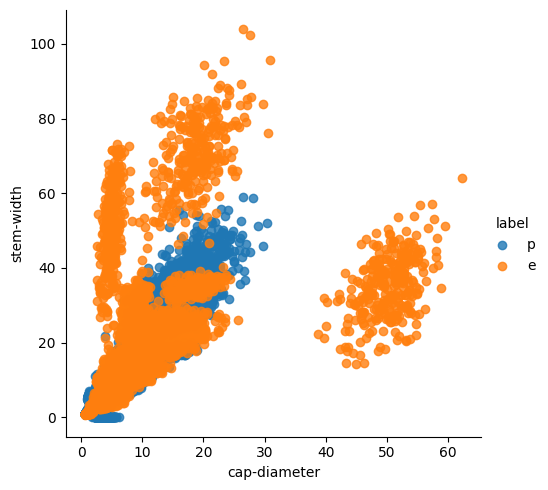

In [128]:
sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-width', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

### Split data

In [129]:
def split_data(data, split_column, split_value): 

    """
    Splits the data into two subsets based on a specified feature and split value.

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    - split_column: the index of the column (feature) on which to split the data.
    - split_value: the value in the feature column to use as the threshold for splitting.

    Returns:
    - data_below: subset of data where the feature values are less than or equal to the split value (for continuous features) or equal to the split value (for categorical features).
    - data_above: subset of data where the feature values are greater than the split value (for continuous features) or not equal to the split value (for categorical features).
    """
    
    split_column_values = data[:, split_column]  # we extract all the values from the specified column

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous": # if the feature is continuous, split based on the threshold value
        data_below = data[split_column_values <= split_value] # data below the split value
        data_above = data[split_column_values >  split_value] # data above the split value
    
    # feature is categorical   
    else: # if the feature is categorical, split based on matching the value
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

In [130]:
# example continuos variable

split_column = 0
split_value = 5

split_column_values = data[:, split_column]

split_column_values <= split_value

array([False, False, False, ...,  True,  True,  True])

In [131]:
# example categorical variables 

split_column = 1
split_value == 'b'

split_column_values = data[:, split_column]

split_column_values == split_value

array([False, False, False, ..., False, False, False])

### Scaled entropy

In [132]:
def scaled_entropy(data): 

    """
    Computes the scaled entropy of a dataset

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.

    Returns:
    - entropy: the scaled entropy value for the dataset.
    """
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts = True) # unique classes and their counts in the label column

    probabilities = counts / counts.sum() # probability of each class
    entropy = sum((- probabilities/2) * np.log2(probabilities + 1e-10) - (1 - probabilities)/2 * np.log2(1 + 1e-10 - probabilities))
     
    return entropy

In [133]:
_, counts = np.unique(label_column, return_counts=True)
print(counts)

[13546 16106]


In [134]:
counts.sum()

29652

In [135]:
probabilities = counts / counts.sum()

probabilities

array([0.45683259, 0.54316741])

In [136]:
scaled_entropy(data) # near to one, so there is a high confunsion between the data

0.9946165918296052

In [137]:
scaled_entropy(test_df.values)

0.9949970122922583

In [138]:
def calculate_overall_entropy(data_below, data_above): # we will compute the entropy belonging to the below data and to the above data

    """
    Computes the weighted average of the entropy for two subsets of data (data_below and data_above).
    This is used to evaluate the quality of a split in a decision tree.

    Parameters:
    - data_below: a 2D numpy array representing the subset of data that falls below a certain split value.
    - data_above: a 2D numpy array representing the subset of data that falls above a certain split value.

    Returns:
    - overall_entropy: the weighted entropy of the combined subsets.
    """
    
    n = len(data_below) + len(data_above) # total number of data points in both subsets
    p_data_below = len(data_below) / n # proportion of data points in the 'data_below' subset
    p_data_above = len(data_above) / n # proportion of data points in the 'data_above' subset

    # we compute the overall weighted entropy by taking the weighted sum of the entropies of both subsets
    overall_entropy =  (p_data_below * scaled_entropy(data_below) 
                      + p_data_above * scaled_entropy(data_above))
    
    return overall_entropy

### Gini function

In [139]:
def gini_impurity (data):

    """
    Computes the Gini impurity of a dataset

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.

    Returns:
    - gini: the Gini impurity of the dataset.
    """
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    gini = sum(2*probabilities * (1 - probabilities))
     
    return gini

In [140]:
gini_impurity (data)

0.9925462993367973

In [141]:
def calculate_overall_gini(data_below, data_above):

    """
    Computes the weighted Gini impurity for a given split of data.

    Parameters:
    - data_below: a subset of the data after applying a split, containing instances that fall below the split value.
    - data_above: a subset of the data after applying a split, containing instances that fall above the split value.

    Returns:
    - overall_gini: the weighted Gini impurity of the split.
    """
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_gini =  (p_data_below * gini_impurity (data_below) 
                    + p_data_above * gini_impurity (data_above))
    
    return overall_gini

### Bhattacharyya coefficient

In [142]:
def bhattacharyya_coefficient (data):

    """
    Computes the Bhattacharyya Coefficient of a dataset

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.

    Returns:
    - bhatt_coeff: the Bhattacharyya Coefficient of the dataset.
    """
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    bhatt_coeff = sum(np.sqrt(probabilities * (1 - probabilities)))

    return bhatt_coeff

In [143]:
bhattacharyya_coefficient (data)

0.996266178958614

In [144]:
def calculate_overall_bhattacharyya_coefficient (data_below, data_above):

    """
    Computes the weighted Bhattacharyya coefficient for a given split of data.

    Parameters:
    - data_below: a subset of the data after applying a split, containing instances that fall below the split value.
    - data_above: a subset of the data after applying a split, containing instances that fall above the split value.

    Returns:
    - overall_bhatt_coeff: the weighted Bhattacharyya coefficient of the split.
    """
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_bhatt_coeff = (p_data_below * bhattacharyya_coefficient (data_below) 
                      + p_data_above * bhattacharyya_coefficient (data_above))
    
    return overall_bhatt_coeff

### Determine best split according to the Scaled Entropy

In [145]:
# we would like to look at all the potential split and determine the one split that result in the lowest overall entropy 

def determine_best_split_scaled_entropy(data, potential_splits):

    """
    Determines the best split for the dataset based on the scaled entropy criterion.
    This function should look at all the potential split and then determine the one split that result in the lowest overall entropy

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    - potential_splits: a dictionary where keys are column indices and values are lists of potential split values for those columns.

    Returns:
    - best_split_column: the index of the column where the best split occurs.
    - best_split_value: the value of the feature where the best split occurs.
    """
    
    overall_entropy = 9999  # we initialize the overall entropy with a very high value
    for column_index in potential_splits: # so this will loop over the keys that are the column indices
        for value in potential_splits[column_index]: # this will loop over all the elements of the dictionary
            data_below, data_above = split_data(data, split_column=column_index, split_value=value) # split the data based on the current feature and split value
            current_overall_entropy = calculate_overall_entropy(data_below, data_above) # calculate the overall entropy for the current split

            if current_overall_entropy <= overall_entropy: # is the current overall entropy smaller or equal than the initial overall entropy ? it can be equal because there could be more split that gives back the same cut in the entropy
                overall_entropy = current_overall_entropy # if yes we are going to update the overall entropy and we are going to save this values in the 'best_split_column' and 'best_split_value' values
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

### Determine best split according to the Gini Impurity

In [146]:
def determine_best_split_gini(data, potential_splits):

    """
    Determines the best split for the dataset based on the Gini impurity criterion.
    This function should look at all the potential split and then determine the one split that result in the lowest overall gini impurity

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    - potential_splits: a dictionary where keys are column indices and values are lists of potential split values for those columns.

    Returns:
    - best_split_column: the index of the column where the best split occurs.
    - best_split_value: the value of the feature where the best split occurs.
    """
    
    overall_gini = 9999
    for column_index in potential_splits: 
        for value in potential_splits[column_index]: 
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_gini = calculate_overall_gini(data_below, data_above)

            if current_overall_gini <= overall_gini:
                overall_gini = current_overall_gini 
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

### Determine best split according to the Bhattacharyya coefficient

In [147]:
def determine_best_split_bhattacharyya_coefficient(data, potential_splits):

    """
    Determines the best split for the dataset based on the Bhattacharyya coefficient criterion.
    This function should look at all the potential split and then determine the one split that result in the lowest overall Bhattacharyya coefficient

    Parameters:
    - data: a 2D numpy array of the training set where each row is an example and the last column contains the labels.
    - potential_splits: a dictionary where keys are column indices and values are lists of potential split values for those columns.

    Returns:
    - best_split_column: the index of the column where the best split occurs.
    - best_split_value: the value of the feature where the best split occurs.
    """
    
    overall_3 = 9999
    for column_index in potential_splits: 
        for value in potential_splits[column_index]: 
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_3 = calculate_overall_bhattacharyya_coefficient (data_below, data_above)

            if current_overall_3 <= overall_3:
                overall_3 = current_overall_3 
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [148]:
def split_method(data, potential_splits, criterion='gini'):
    if criterion == 'scaled_entropy':
        return determine_best_split_scaled_entropy(data, potential_splits)
    elif criterion == 'gini':
        return determine_best_split_gini(data, potential_splits)
    elif criterion == 'bhatt_coeff':
        return determine_best_split_bhattacharyya_coefficient(data, potential_splits)

### Decision Tree Algorithm

In [149]:
def decision_tree(df, counter = 0, min_samples = 200, max_depth = 5, criterion = 'scaled_entropy'):

    """
    Constructs a decision tree for the given dataset.

    Parameters:
    - df: the input dataframe where rows are samples and columns include features and the label.
    - counter: the current depth of the tree (used for recursion).
    - min_samples: minimum number of samples required to split an internal node.
    - max_depth: maximum depth of the tree.
    - criterion: the criterion used to choose the best split ('scaled_entropy', 'gini', 'bhatt_coeff').

    Returns:
    - A decision tree 
    """
    
    # data preparations for the first function call. we initialize global variables for column headers and feature types
    if counter == 0: # so in the first call of the function we give a general information about the data since all the helper function works for a 2d numpy array 
        global COLUMN_HEADERS, FEATURE_TYPES # we specify these variables as globals
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = categorize_features(df)
        data = df.values
    else:
        data = df # for recursive calls, use the provided data          
    
    
    # base cases, where the stopping conditions are presented
    # evaluate_purity gives back a boolean array that can be directly be classifies
    # also we classify a data if there are not 'min_samples' datapoints, even though it could not be pure yet
    # so if in a particular node the number of samples becomes less than the minimum samples then we will not split that node any further and it will be a leaf node
    # if the depth of the tree reach the maximum depth we will not split the nodes further
    if (evaluate_purity(data)) or (len(data) < min_samples) or (counter == max_depth): 
        classification = determine_majority_class(data)
        
        return classification

    
    # recursive part:split the data and continue building the tree
    else:    
        counter += 1

        potential_splits = find_possible_splits(data) # we determine possible splits for each feature
        split_column, split_value = split_method(data, potential_splits, criterion=criterion) # the we select the best split based on the chosen criterion
        data_below, data_above = split_data(data, split_column, split_value) # and finally we split the data into two subsets based on the best split
        
        # check for case where a split results in empty subsets
        if len(data_below) == 0 or len(data_above) == 0: 
            classification = determine_majority_class(data)
            return classification
        
        # determine question for the decision tree node
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # creation of a new sub-tree with the formulated question
        sub_tree = {question: []} # in that empty list we want to append the yes or no answer 
        
        # recursively build the subtrees for the 'yes' and 'no' branches of the current split
        yes_answer = decision_tree(data_below, counter, min_samples, max_depth, criterion)
        no_answer = decision_tree(data_above, counter, min_samples, max_depth, criterion)
        
        # if the answers are the same, then there is no point in asking the question and we can use that answer directly
        # this could happen when the data is classified even though it is not pure yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

### Evaluation functions

In [150]:
def predict_example(example, tree):

    """
    Predicts the class label for a given example using the provided decision tree.

    Parameters:
    - example: a dictionary representing a single data instance with feature names as keys.
    - tree: the decision tree previously computed.

    Returns:
    - The predicted class label for the example.
    """

    question = list(tree.keys())[0] # get the question at the current node of the tree
    feature_name, comparison_operator, value = question.split(" ") # for example feature name is 'stem-width', comparison operator is '<=' and value is '8.85'

    # ask the question and determine which branch to follow
    
    # if feature is continuous, compare the feature value to the split value
    if comparison_operator == "<=":  
        if example[feature_name] <= float(value):
            answer = tree[question][0] # yes answer
        else:
            answer = tree[question][1] # no answer
    
    # if the feature is categorical, compare the feature value to the split value
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # if the answer is not a dictionary, then it is a leaf node, and we return the predicted class label
    if not isinstance(answer, dict):
        return answer
    
    # recursive part: if the answer is a dictionary, continue traversing the tree 
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [151]:
def compute_accuracy(df, tree):

    """
    Computes the accuracy of a decision tree classifier on a given dataset.

    Parameters:
    - df: the input dataset 
    - tree: the decision tree previously computed

    Returns:
    - The accuracy of the decision tree on the given dataset.
    """
    
    # we have to apply the prediction function to each row of the dataset
    # The 'args' parameter is used to pass additional arguments to the function (i.e., the decision tree).
    # 'axis=1' ensures that the function is applied row-wise.
    df["classification"] = df.apply(predict_example, args = (tree,), axis = 1) # this variable will contain the classfification of our examples

    # new column to check if the classification is correct. It contains a boolean value (True/False) indicating whether the predicted class matches the true class.
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean() # mean of the 'classification_correct' column, which gives the proportion of correct classifications.
    
    return accuracy

In [152]:
def zero_one_loss(y_true, y_pred):

    """
    Computes the zero-one loss between true labels and predicted labels.

    Parameters:
    - y_true: a list or array-like object containing the true class labels.
    - y_pred: a list or array-like object containing the predicted class labels.

    Returns:
    - The zero-one loss, which represents the proportion of incorrect predictions.
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


    # element-wise comparison between true labels and predicted labels
    # np.sum counts the number of False values (which indicate incorrect predictions)
    
    incorrect_predictions = np.sum(y_true != y_pred)
    
    loss = incorrect_predictions / len(y_true) #  proportion of incorrect predictions relative to the total number of samples
    
    return loss

### Tree output

In [153]:
random.seed(0)
train_df, test_df = split_train_test(df, test_size = 0.2)

"""
Parameters:
    - min_samples: minimum number of samples required to split an internal node.
    - max_depth: maximum depth of the tree.
    - criterion: the criterion used to choose the best split ('scaled_entropy', 'gini', 'bhatt_coeff').

"""

tree = decision_tree(train_df, min_samples = 500, max_depth = 5, criterion='scaled_entropy')
pprint(tree)

{'stem-width <= 8.85': [{'stem-color = gray': [{'gill-attachment = conical': ['p',
                                                                              'e']},
                                               {'stem-height <= 3.2': [{'stem-color = white': ['p',
                                                                                               {'gill-attachment = conical': ['e',
                                                                                                                              'p']}]},
                                                                       'p']}]},
                        {'gill-attachment = convex': [{'stem-color = white': [{'cap-surface = silky': ['p',
                                                                                                       {'cap-diameter <= 3.67': ['p',
                                                                                                                                 'e']}]},
      

### Classification of examples

In [154]:
example = test_df.iloc[0]
example

cap-diameter                           8.05
cap-shape                            convex
cap-surface                         fibrous
cap-color                             brown
does-bruise-or-bleed    not-bruises-bleedin
gill-attachment                        bell
gill-color                            brown
stem-height                            9.44
stem-width                            14.27
stem-color                            brown
has-ring                               none
ring-type                              none
habitat                               woods
season                               autumn
label                                     p
Name: 38308, dtype: object

In [155]:
list(tree.keys())[0]

'stem-width <= 8.85'

In [156]:
example['stem-width']

14.27

In [157]:
example['stem-width'] <= 8.85

False

In [158]:
question = list(tree.keys())[0]
tree[question][1] # no answer

{'gill-attachment = convex': [{'stem-color = white': [{'cap-surface = silky': ['p',
      {'cap-diameter <= 3.67': ['p', 'e']}]},
    {'stem-color = orange': ['e', 'p']}]},
  {'cap-color = red': [{'cap-surface = dry': ['e', 'p']},
    {'gill-color = orange': ['p', {'cap-surface = grooves': ['p', 'e']}]}]}]}

In [159]:
predict_example(example, tree)

'e'

### Tree evaluation

In [160]:
y_pred_train = [predict_example(train_df.loc[i], tree) for i in train_df.index]

y_pred_test = [predict_example(test_df.loc[i], tree) for i in test_df.index]

In [161]:
y_true_train = train_df['label']

In [162]:
y_true_test = test_df['label']

In [163]:
zero_one_loss(y_true_test, y_pred_test)

0.23796033994334279

In [164]:
zero_one_loss(y_true_train, y_pred_train)

0.22878726561446108

In [165]:
compute_accuracy(test_df, tree)

0.7620396600566572

In [166]:
compute_accuracy(train_df, tree)

0.771212734385539

In [167]:
confusion_matrix(y_true_test, y_pred_test)

array([[2473,  925],
       [ 839, 3176]], dtype=int64)

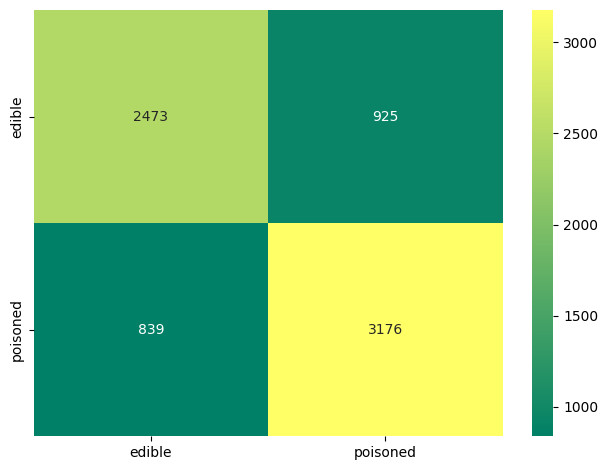

In [168]:
classes = ['edible', 'poisoned']
features = df.columns

sns.heatmap(confusion_matrix(y_true_test, y_pred_test),yticklabels=classes,
            xticklabels=classes,annot=True,cmap='summer', fmt='g')
plt.tight_layout()
plt.show()

In [169]:
test_df

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
38308          8.05    convex     fibrous     brown  not-bruises-bleedin   
42388          5.08      flat     fibrous     brown  not-bruises-bleedin   
5830          16.48    convex      fleshy      gray  not-bruises-bleedin   
27205         19.21    sunken       silky     white      bruises-bleedin   
53627          7.95    convex      sticky     green      bruises-bleedin   
...             ...       ...         ...       ...                  ...   
32252          4.13      bell      sticky     brown  not-bruises-bleedin   
49293          7.88    convex         dry       red      bruises-bleedin   
42868         13.64      flat      smooth     brown      bruises-bleedin   
20124          5.83    convex         dry    orange  not-bruises-bleedin   
5983          12.73      flat      fleshy     brown  not-bruises-bleedin   

      gill-attachment gill-color  stem-height  stem-width stem-color has-ring  \
38308            bell      brown         9.44       14.27      brown     none   
42388            flat      brown         4.01       11.58      white     ring   
5830           convex      white        10.73       28.45      white     none   
27205          convex      brown         7.48       28.90      white     none   
53627          convex      brown         5.59       14.93      brown     none   
...               ...        ...          ...         ...        ...      ...   
32252         conical       pink         5.39        4.62       gray     none   
49293       spherical      green         6.37       13.21     yellow     none   
42868            flat      brown         9.04       15.86      white     ring   
20124          convex     orange         6.00       11.32      white     none   
5983             bell      white         6.89       23.98      white     none   

      ring-type  habitat  season label classification  classification_correct  
38308      none    woods  autumn     p              e                   False  
42388   flaring    waste  autumn     e              e                    True  
5830       none   leaves  autumn     e              e                    True  
27205      none    woods  winter     p              p                    True  
53627      none   heaths  autumn     p              p                    True  
...         ...      ...     ...   ...            ...                     ...  
32252      none    woods  summer     p              p                    True  
49293      none    woods  summer     e              e                    True  
42868     large  meadows  autumn     e              e                    True  
20124      none  meadows  winter     e              e                    True  
5983       none   leaves  winter     e              e                    True  

[7413 rows x 17 columns]

In [170]:
test_df.loc[38308]

cap-diameter                             8.05
cap-shape                              convex
cap-surface                           fibrous
cap-color                               brown
does-bruise-or-bleed      not-bruises-bleedin
gill-attachment                          bell
gill-color                              brown
stem-height                              9.44
stem-width                              14.27
stem-color                              brown
has-ring                                 none
ring-type                                none
habitat                                 woods
season                                 autumn
label                                       p
classification                              e
classification_correct                  False
Name: 38308, dtype: object

In [171]:
test_df.loc[49293]

cap-diameter                         7.88
cap-shape                          convex
cap-surface                           dry
cap-color                             red
does-bruise-or-bleed      bruises-bleedin
gill-attachment                 spherical
gill-color                          green
stem-height                          6.37
stem-width                          13.21
stem-color                         yellow
has-ring                             none
ring-type                            none
habitat                             woods
season                             summer
label                                   e
classification                          e
classification_correct               True
Name: 49293, dtype: object

In [172]:
test_df = test_df.iloc[:, :-2]

In [ ]:
train_df = train_df.iloc[:, :-2]

### Hyperparameter tuning

In [ ]:
grid_search = {"max_depth": [], "min_samples": [], "accuracy_train": [], "accuracy_test": []}

for max_depth in range(3, 7):
    for min_samples in range(500, 3000, 500):

        tree = decision_tree(train_df, max_depth=max_depth, min_samples=min_samples, criterion = 'scaled_entropy')

        y_true_train = train_df['label'].values
        y_true_test = test_df['label'].values

        y_pred_train = [predict_example(train_df.loc[i], tree) for i in train_df.index]
        y_pred_test = [predict_example(test_df.loc[i], tree) for i in test_df.index]


        accuracy_train = accuracy_score(y_true_train, y_pred_train)
        accuracy_test = accuracy_score(y_true_test, y_pred_test)

        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["accuracy_train"].append(accuracy_train)
        grid_search["accuracy_test"].append(accuracy_test)
        
    print(f"Progress: Iteration max_depth={max_depth}/6")

grid_search_df = pd.DataFrame(grid_search)
grid_search_df.sort_values("accuracy_test", ascending=False)


In [ ]:
train_accuracies = []
test_accuracies = []


for max_depth in range(1, 25):
    
    tree = decision_tree(train_df, min_samples=500, max_depth=max_depth, criterion = 'scaled_entropy')

    y_true_train = train_df['label'].values

    
    y_true_test = test_df['label'].values

    y_pred_train = [predict_example(train_df.loc[i], tree) for i in train_df.index]
    y_pred_test = [predict_example(test_df.loc[i], tree) for i in test_df.index]


    accuracy_train = accuracy_score(y_true_train, y_pred_train)
    accuracy_test = accuracy_score(y_true_test, y_pred_test)

    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label= "train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc = "upper left")
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size = 15)
plt.ylabel("accuracy", size = 15)
plt.show()

In [ ]:
random.seed(0)

train_df, test_df = split_train_test(df, test_size=0.2)
tree = decision_tree(train_df, min_samples = 20, max_depth=5)
accuracy = compute_accuracy(test_df, tree)

pprint(tree)
accuracy

### K-fold cross validation

In [ ]:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

In [ ]:
def kfold_indices(df, k):
    fold_size = len(df) // k
    indices = np.arange(len(df))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

k = 5

fold_indices = kfold_indices(df, k)

In [ ]:
fold_indices

In [ ]:
cnt = 1

for train_indices, test_indices in fold_indices:
    print(f'Fold:{cnt}, Train set: {len(train_indices)}, Test set:{len(test_indices)}')
    cnt += 1
    print(test_indices)

In [ ]:
scores = []

for train_indices, test_indices in fold_indices:
    train_df = df.iloc[train_indices]
    test_df = df.iloc[test_indices]

    tree_cv = decision_tree(train_df, min_samples=500, max_depth=5, criterion='scaled_entropy')

    y_true_test = test_df['label'].values
    y_pred_test = [predict_example(test_df.loc[i], tree_cv) for i in test_df.index]

    fold_score = accuracy_score(y_true_test, y_pred_test)

    scores.append(fold_score)

mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)